## 참고: https://hleecaster.com/ml-linear-regression-example/

## 라이브러리 설치, 호출

!pip3 install -U scikit-learn<br>
!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

## 데이터 다운로드 (특별할인 판매)

In [2]:
import pandas as pd
TRAIN = pd.read_csv('train.csv')
VALID = pd.read_csv('valid.csv')

# Input, Feature 설정

In [15]:
TRAIN_y = TRAIN[['Relapse']]
TRAIN_x = TRAIN[ TRAIN.columns[1:] ]

VALID_y = VALID[['Relapse']]
VALID_x = VALID[ VALID.columns[1:] ]

## Keras Logit 모델 fitting

In [16]:
VALID_x.shape

(98, 8)

In [25]:
model = Sequential()
model.add(Dense(5, activation='linear', input_shape=(8,)))
model.add(Dense(10, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

# CallBack 함수를 통해 LR을 낮출 것이므로, 초기 LR을 높게 잡기
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
#0.001

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                60        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


## CALL BACK 함수 셋팅

In [27]:
# Call-back 함수
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
CP = ModelCheckpoint(filepath='{epoch:03d}-{loss:.4f}-{accuracy:.4f}-{val_loss:.4f}.hdf5',
            monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#minitor -> loss -> val_loss

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=4,
                       verbose=1, min_lr=1e-8)
# factor: Learning rate에 곱할 것.
#0.1 -> 0.08 -> 0.064 ....
#monitor='loss' -> monitor='val_loss'

CALLBACK = [CP, LR]

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])


In [31]:
model.fit(x=TRAIN_x, y=TRAIN_y, epochs=200, shuffle=True,
          batch_size=32, callbacks=CALLBACK, validation_data = (VALID_x, VALID_y))

Epoch 1/200
13/13 [==============================] - 0s 13ms/step - loss: 2.2302 - accuracy: 0.5440 - val_loss: 0.7795 - val_accuracy: 0.4898

Epoch 00001: val_loss did not improve from 0.62259
Epoch 2/200
13/13 [==============================] - 0s 7ms/step - loss: 1.1554 - accuracy: 0.5206 - val_loss: 1.0190 - val_accuracy: 0.3878

Epoch 00002: val_loss did not improve from 0.62259
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.8086 - accuracy: 0.5732 - val_loss: 0.6117 - val_accuracy: 0.7245

Epoch 00003: val_loss improved from 0.62259 to 0.61167, saving model to 003-0.7639-0.6122-0.6117.hdf5
Epoch 4/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6605 - accuracy: 0.6107 - val_loss: 0.6427 - val_accuracy: 0.6531

Epoch 00004: val_loss did not improve from 0.61167
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6390 - accuracy: 0.6595 - val_loss: 0.6426 - val_accuracy: 0.6429

Epoch 00005: val_loss did not impr

KeyboardInterrupt: 

In [22]:
model.load_weights('-011-0.6778-0.5918-0.6678.hdf5')

In [32]:
model.predict(VALID_x)

array([[0.4453733 ],
       [0.3992342 ],
       [0.47151455],
       [0.25959498],
       [0.4810236 ],
       [0.525337  ],
       [0.3065454 ],
       [0.5190637 ],
       [0.55606884],
       [0.5325421 ],
       [0.58463776],
       [0.4826668 ],
       [0.57039464],
       [0.5579886 ],
       [0.70330054],
       [0.50074613],
       [0.2673866 ],
       [0.36141443],
       [0.24365804],
       [0.2287034 ],
       [0.18412009],
       [0.21114911],
       [0.30264673],
       [0.2640684 ],
       [0.398275  ],
       [0.43198514],
       [0.38023058],
       [0.27718014],
       [0.31826138],
       [0.4539213 ],
       [0.21778858],
       [0.1914539 ],
       [0.68346834],
       [0.28908867],
       [0.470838  ],
       [0.6214945 ],
       [0.2555138 ],
       [0.21165326],
       [0.23679332],
       [0.646014  ],
       [0.2703391 ],
       [0.4352468 ],
       [0.59612113],
       [0.65621346],
       [0.6246671 ],
       [0.1884915 ],
       [0.27159938],
       [0.243

In [41]:
FinalPrediction = pd.DataFrame({
    'Label': VALID_y['Relapse'],
    'Prediction': model.predict(VALID_x)[:,0]
})

In [42]:
import seaborn

<AxesSubplot:xlabel='Label', ylabel='Prediction'>

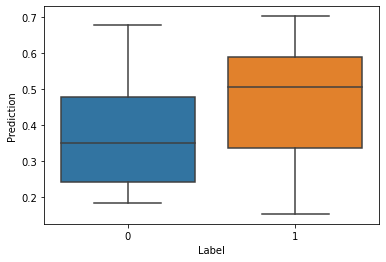

In [45]:
seaborn.boxplot(data=FinalPrediction, x='Label', y='Prediction')

# AUROC 및 ROC curve 그리기

## 당연히 Validation set에서 보는것이 맞음

In [46]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

In [48]:
print(roc_auc_score(VALID_y, model.predict(VALID_x)))

0.6901315789473684


In [50]:
from sklearn import metrics
# ROC curve 시각화
Label = VALID_y
pred = model.predict(VALID_x)
fpr, tpr, _ = metrics.roc_curve(Label,  pred)

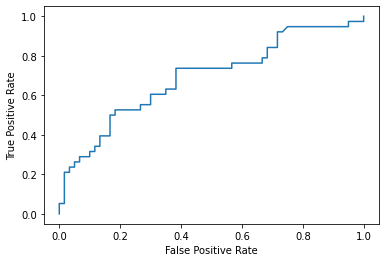

In [51]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.696836203444133


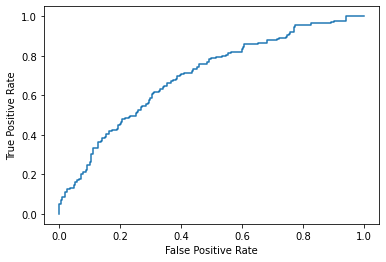

In [53]:
from sklearn import metrics
print(roc_auc_score(TRAIN_y, model.predict(TRAIN_x)))
# ROC curve 시각화
Label = TRAIN_y
pred = model.predict(TRAIN_x)
fpr, tpr, _ = metrics.roc_curve(Label,  pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()